<a href="https://colab.research.google.com/github/magnusaghe/PROJECTS/blob/main/Magnus_Aghe_ANA500_MicroProject_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Micro-Project 4 Begins**

**Using Neural Network's LSTM in TensorFlow to Predict Microsoft Stock Price**

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(16,8)})
sns.set(font_scale=1.3)
plt.style.use('fivethirtyeight')

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, RepeatVector, TimeDistributed
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

from sklearn.metrics import mean_squared_error
import math
from math import floor,ceil,sqrt
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
url = 'https://raw.githubusercontent.com/magnusaghe/ANA500/main/Microsoft_Stock.csv'
df = pd.read_csv(url, parse_dates=[0])

In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322
1,2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476
2,2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692
3,2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375
4,2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438


In [ ]:
# Converting the date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
def lstm_prediction(df):
    shape=df.shape[0]
    df_new=df[['Close']]
    df_new.head()
    dataset = df_new.values
    train=df_new[:ceil(shape*0.80)]
    valid=df_new[ceil(shape*0.80):]
    print('---------------------------------------------------------------------------------------')
    print('-----------MICROSOFT STOCK PRICE PREDICTION BY LONG SHORT TERM MEMORY (LSTM)-----------')
    print('---------------------------------------------------------------------------------------')
    print('Shape of Training Set',train.shape)
    print('Shape of Validation Set',valid.shape)
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(dataset)
    x_train, y_train = [], []
    for i in range(40,len(train)):
        x_train.append(scaled_data[i-40:i,0])
        y_train.append(scaled_data[i,0])
    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
    model = Sequential()
    model.add(LSTM(units=128, return_sequences=True, input_shape=(x_train.shape[1],1)))
    model.add(LSTM(units=64))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(x_train, y_train, epochs=50, batch_size=32, verbose=2)
    inputs = df_new[len(df_new) - len(valid) - 40:].values
    inputs = inputs.reshape(-1,1)
    inputs  = scaler.transform(inputs)
    X_test = []
    for i in range(40,inputs.shape[0]):
        X_test.append(inputs[i-40:i,0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
    closing_price = model.predict(X_test)
    closing_price = scaler.inverse_transform(closing_price)
    rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
    print('RMSE value on validation set:',rms)
    print('-----------------------------------------------------------')
    print('-----------------------------------------------------------')
    valid['Predictions'] = closing_price
    plt.plot(train['Close'])
    plt.plot(valid[['Close','Predictions']])
    plt.xlabel('Date',size=15)
    plt.ylabel('Stock Price',size=15)
    plt.title('Microsoft Stock Price Prediction by Long Short Term Memory (LSTM)',size=15)
    plt.legend(['Model Training Data','Actual Data','Predicted Data'])
    plt.figure(figsize=(10, 6))

---------------------------------------------------------------------------------------
-----------MICROSOFT STOCK PRICE PREDICTION BY LONG SHORT TERM MEMORY (LSTM)-----------
---------------------------------------------------------------------------------------
Shape of Training Set (1209, 1)
Shape of Validation Set (302, 1)
Epoch 1/50
37/37 - 8s - loss: 0.0058 - 8s/epoch - 219ms/step
Epoch 2/50
37/37 - 3s - loss: 1.5205e-04 - 3s/epoch - 80ms/step
Epoch 3/50
37/37 - 3s - loss: 1.1017e-04 - 3s/epoch - 88ms/step
Epoch 4/50
37/37 - 4s - loss: 1.0808e-04 - 4s/epoch - 111ms/step
Epoch 5/50
37/37 - 3s - loss: 1.0977e-04 - 3s/epoch - 81ms/step
Epoch 6/50
37/37 - 3s - loss: 1.1519e-04 - 3s/epoch - 80ms/step
Epoch 7/50
37/37 - 3s - loss: 1.0833e-04 - 3s/epoch - 93ms/step
Epoch 8/50
37/37 - 4s - loss: 1.0830e-04 - 4s/epoch - 99ms/step
Epoch 9/50
37/37 - 3s - loss: 1.1417e-04 - 3s/epoch - 75ms/step
Epoch 10/50
37/37 - 3s - loss: 1.0775e-04 - 3s/epoch - 78ms/step
Epoch 11/50
37/37 - 3s - loss: 1

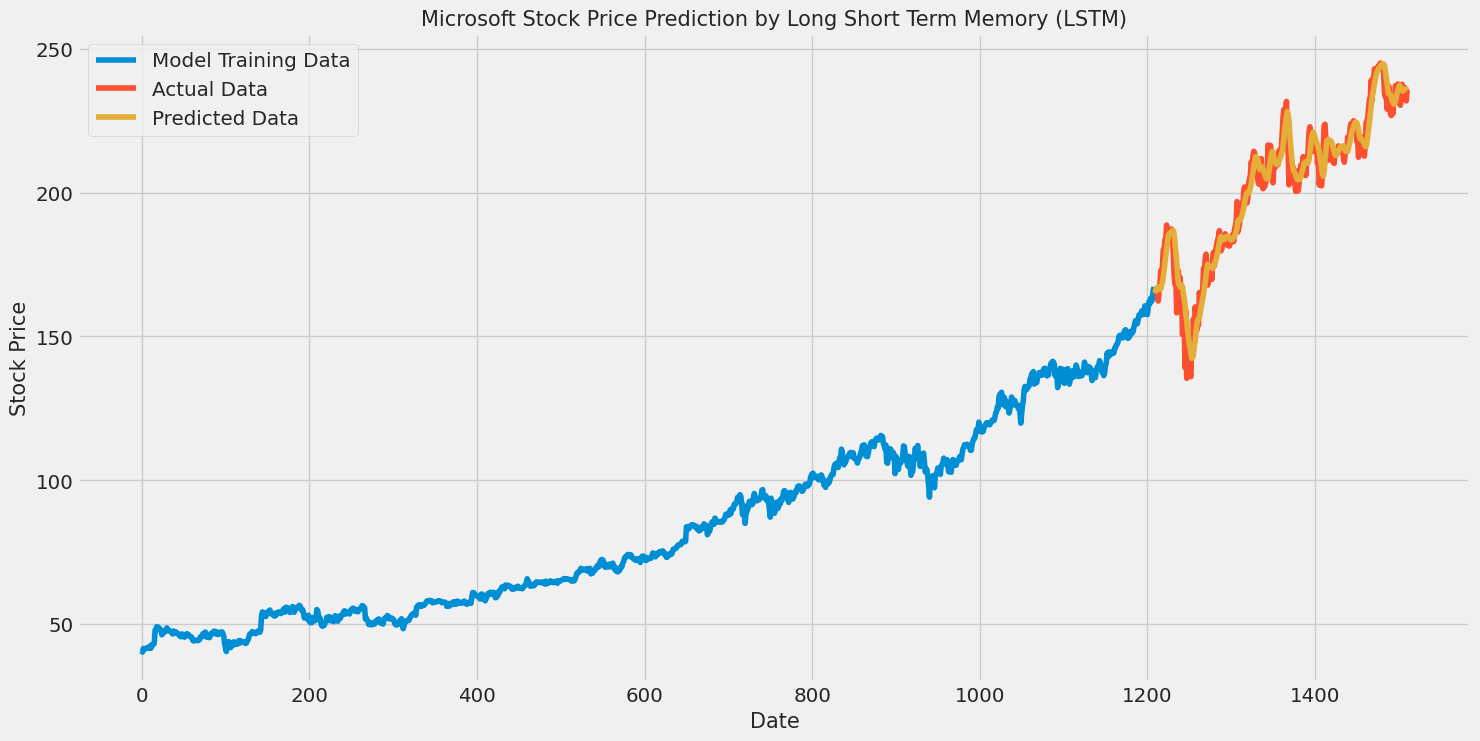

<Figure size 1000x600 with 0 Axes>

In [ ]:
lstm_prediction(df)